In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# The -q flag stands for "quiet" (hides the list of 1000s of files)
# The -d flag specifies the destination folder
!unzip -q /content/Fish.v1-416x416.yolov11.zip -d /content/fish_dataset

In [ ]:
from ultralytics import YOLO

model = YOLO('yolo11m.pt')

model.train(
    data='/content/fish_dataset/data.yaml',
    epochs=30,
    imgsz=416,
    single_cls=True,  # This merges all 26 classes into one "object" class
    device=0
)

Ultralytics 8.3.252 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/fish_dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x793d84f78470>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 


image 1/1 /content/input_fish.jpg: 224x416 21 items, 15.9ms
Speed: 0.9ms preprocess, 15.9ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 416)
Total Fish Detected: 21


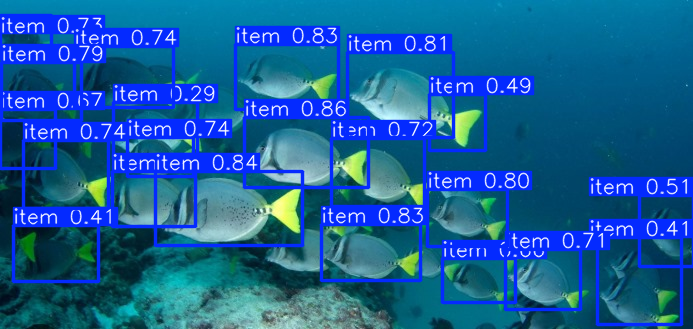

In [ ]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow

# 1. Load the best model you just trained
model = YOLO('/content/yolov9/runs/detect/train2/weights/best.pt')

# 2. Run prediction on an image
# Replace 'input_fish.jpg' with your actual image path
results = model.predict(source='/content/input_fish.jpg', conf=0.25)

# 3. Print how many fish were found
fish_count = len(results[0].boxes)
print(f"Total Fish Detected: {fish_count}")

# 4. Show the image with boxes
res_plotted = results[0].plot()
cv2_imshow(res_plotted)

In [ ]:
import shutil
import os

# 1. Define the source (where the file is now)
source = '/content/yolov9/runs/detect/train2/weights/best.pt'

# 2. Define the destination (your Google Drive folder)
# We will rename it to 'fish_yolo11_best.pt' to keep it organized
destination_folder = '/content/drive/MyDrive/YOLOv11_Fish_Project/'
destination_file = os.path.join(destination_folder, 'fish_yolo11_best.pt')

# 3. Create the folder if it doesn't exist (just in case)
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# 4. Copy the file
shutil.copy(source, destination_file)

print(f"✅ Success! Your model is now safely stored at: {destination_file}")

✅ Success! Your model is now safely stored at: /content/drive/MyDrive/YOLOv11_Fish_Project/fish_yolo11_best.pt


In [ ]:
import albumentations as A
from ultralytics import YOLO

# 1. Define the Underwater Augmentation Pipeline
# We target: Low contrast, blue-ish tint, and murky/jittery blur
underwater_augmentations = [
    # Simulate murky water with Blur
    A.GaussianBlur(blur_limit=(3, 7), p=0.5),

    # Lower the contrast and adjust brightness for "deep water" feel
    A.RandomBrightnessContrast(brightness_limit=0.1, contrast_limit=(-0.4, -0.2), p=0.8),

    # Add a slight "Blue/Green" underwater tint (Color Jitter)
    A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=20, p=0.5),

    # Simulate floating particles (marine snow) with slight noise
    A.GaussNoise(var_limit=(10.0, 50.0), p=0.3),
]

# 2. Initialize the YOLO11 Nano Model
model = YOLO('yolo11n.pt')

# 3. Start Training with the custom augmentations
# The 'augmentations' parameter tells YOLO to use our Albumentations list
model.train(
    data='/content/fish_dataset/data.yaml',
    epochs=50,
    imgsz=416,
    single_cls=True,
    batch=32,          # Nano is small, so we can use a larger batch size
    augmentations=underwater_augmentations,
    project='Fish_Nano_Underwater',
    name='v11_nano_custom_aug'
)

Ultralytics 8.3.252 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, augmentations=[GaussianBlur(p=0.5, blur_limit=(3, 7), sigma_limit=(0.5, 3.0)), RandomBrightnessContrast(p=0.8, brightness_by_max=True, brightness_limit=(-0.1, 0.1), contrast_limit=(-0.4, -0.2), ensure_safe_range=False), HueSaturationValue(p=0.5, hue_shift_limit=(-20.0, 20.0), sat_shift_limit=(-30.0, 30.0), val_shift_limit=(-20.0, 20.0)), GaussNoise(p=0.3, mean_range=(0.0, 0.0), noise_scale_factor=1.0, per_channel=True, std_range=(0.2, 0.44))], auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/fish_dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0

/tmp/ipython-input-213777159.py:17: UserWarning: Argument(s) 'var_limit' are not valid for transform GaussNoise
  A.GaussNoise(var_limit=(10.0, 50.0), p=0.3),


  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  8                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  9                  -1  1    164608  ultralytics.nn.modules.block.SPPF            [256, 256, 5]                 
 10                  -1  1    249728  ultralytics.nn.modules.block.C2PSA           [256, 256, 1]                 
 11                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x793c70733fe0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 


image 1/1 /content/input_fish.jpg: 224x416 14 items, 68.9ms
Speed: 1.6ms preprocess, 68.9ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 416)
Total Fish Detected: 14


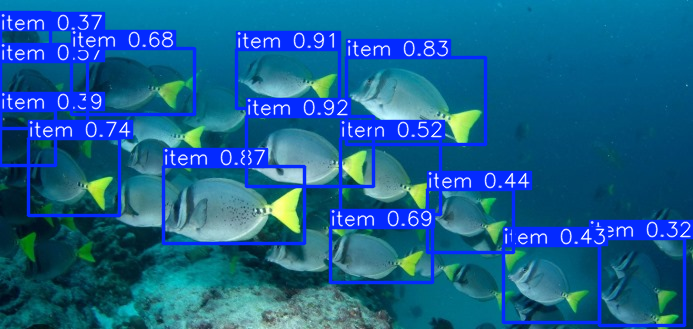

In [ ]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow

# 1. Load the best model you just trained
model = YOLO('/content/yolov9/Fish_Nano_Underwater/v11_nano_custom_aug/weights/best.pt')

# 2. Run prediction on an image
# Replace 'input_fish.jpg' with your actual image path
results = model.predict(source='/content/input_fish.jpg', conf=0.25)

# 3. Print how many fish were found
fish_count = len(results[0].boxes)
print(f"Total Fish Detected: {fish_count}")

# 4. Show the image with boxes
res_plotted = results[0].plot()
cv2_imshow(res_plotted)

In [ ]:
import shutil
import os

# 1. Define the source (where the file is now)
source = '/content/yolov9/Fish_Nano_Underwater/v11_nano_custom_aug/weights/best.pt'

# 2. Define the destination (your Google Drive folder)
# We will rename it to 'fish_yolo11_best.pt' to keep it organized
destination_folder = '/content/drive/MyDrive/YOLOv11_Fish_Project/'
destination_file = os.path.join(destination_folder, 'fish_yolo11n_best.pt')

# 3. Create the folder if it doesn't exist (just in case)
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# 4. Copy the file
shutil.copy(source, destination_file)

print(f"✅ Success! Your model is now safely stored at: {destination_file}")

✅ Success! Your model is now safely stored at: /content/drive/MyDrive/YOLOv11_Fish_Project/fish_yolo11n_best.pt


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 21.4 MB/s eta 0:00:00


🔍 Processing video with Outlier Filtering...
⚠️ Skipped Outlier at Frame 53 (Jumped 439.3px)
⚠️ Skipped Outlier at Frame 54 (Jumped 440.5px)
⚠️ Skipped Outlier at Frame 55 (Jumped 443.9px)
⚠️ Skipped Outlier at Frame 56 (Jumped 445.8px)
⚠️ Skipped Outlier at Frame 57 (Jumped 448.3px)
⚠️ Skipped Outlier at Frame 58 (Jumped 448.6px)
⚠️ Skipped Outlier at Frame 59 (Jumped 449.4px)
⚠️ Skipped Outlier at Frame 60 (Jumped 448.3px)
⚠️ Skipped Outlier at Frame 61 (Jumped 448.3px)
⚠️ Skipped Outlier at Frame 62 (Jumped 449.4px)
⚠️ Skipped Outlier at Frame 63 (Jumped 449.6px)
⚠️ Skipped Outlier at Frame 65 (Jumped 438.9px)
⚠️ Skipped Outlier at Frame 67 (Jumped 446.9px)
⚠️ Skipped Outlier at Frame 72 (Jumped 425.4px)
⚠️ Skipped Outlier at Frame 73 (Jumped 423.8px)
⚠️ Skipped Outlier at Frame 74 (Jumped 421.9px)
⚠️ Skipped Outlier at Frame 75 (Jumped 422.2px)


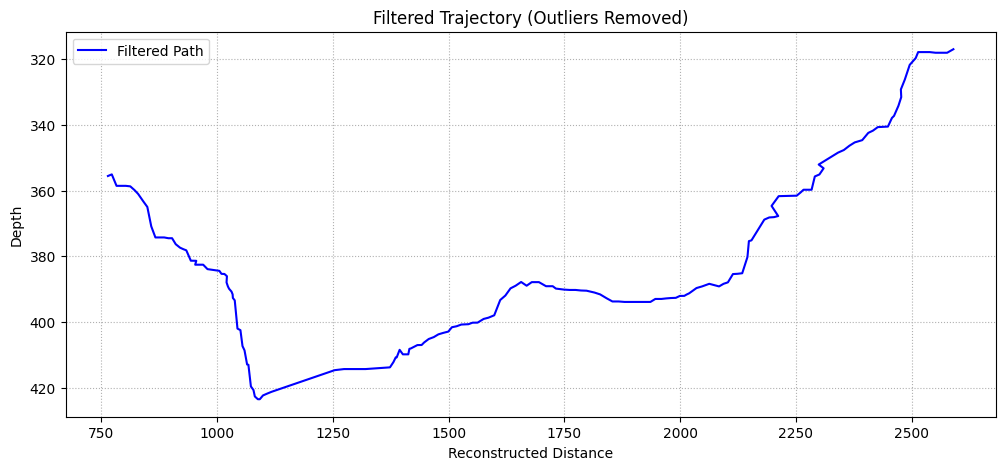

In [ ]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from ultralytics import YOLO
import numpy as np

# --- SETTINGS ---
MODEL_PATH = '/content/drive/MyDrive/YOLOv11_Fish_Project/fish_yolo11n_best.pt'
VIDEO_PATH = '/content/Realistic_Fish_Swimming_Video.mp4'
CONSTANT_SPEED = 10     # Your manual horizontal speed
DISTANCE_THRESHOLD = 50 # Max allowed pixels moved between frames (OUTLIER FILTER)

# --- INITIALIZATION ---
model = YOLO(MODEL_PATH)
cap = cv2.VideoCapture(VIDEO_PATH)
data_log = []
frame_idx = 0
last_valid_point = None # Stores the previous (x,y) to check for jumps

print("🔍 Processing video with Outlier Filtering...")

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model.predict(frame, conf=0.30, verbose=False)

    # Find the largest detection
    largest_box = None
    max_area = 0
    for box in results[0].boxes:
        coords = box.xyxy[0].cpu().numpy()
        area = (coords[2] - coords[0]) * (coords[3] - coords[1])
        if area > max_area:
            max_area = area
            cx, cy = (coords[0] + coords[2]) / 2, (coords[1] + coords[3]) / 2
            largest_box = (cx, cy)

    if largest_box:
        # --- OUTLIER FILTER LOGIC ---
        is_valid = True
        if last_valid_point is not None:
            # Calculate distance from last known good position
            dist = np.sqrt((largest_box[0] - last_valid_point[0])**2 +
                           (largest_box[1] - last_valid_point[1])**2)

            if dist > DISTANCE_THRESHOLD:
                print(f"⚠️ Skipped Outlier at Frame {frame_idx} (Jumped {dist:.1f}px)")
                is_valid = False

        if is_valid:
            # Reconstruct X with constant speed
            path_x = largest_box[0] + (frame_idx * CONSTANT_SPEED)

            data_log.append({
                'frame': frame_idx,
                'original_x': largest_box[0],
                'y': largest_box[1],
                'path_x': path_x
            })
            last_valid_point = largest_box # Update only if point was valid

    frame_idx += 1

cap.release()

# --- SAVE & PLOT ---
df = pd.DataFrame(data_log)
df.to_csv('filtered_fish_trajectory1.csv', index=False)

# Optional: Apply a "Rolling Median" for even smoother lines
df['y_smooth'] = df['y'].rolling(window=5, center=True).median().fillna(df['y'])

plt.figure(figsize=(12, 5))
plt.plot(df['path_x'], df['y_smooth'], color='blue', label='Filtered Path')
plt.gca().invert_yaxis()
plt.title("Filtered Trajectory (Outliers Removed)")
plt.xlabel("Reconstructed Distance")
plt.ylabel("Depth")
plt.grid(True, linestyle=':')
plt.legend()
plt.show()

In [19]:
import cv2
import pandas as pd
import numpy as np
import os
from ultralytics import YOLO
from tqdm import tqdm
from scipy.signal import savgol_filter  # For high-quality smoothing

# --- SETTINGS ---
MODEL_PATH = '/content/drive/MyDrive/YOLOv11_Fish_Project/fish_yolo11n_best.pt'
VIDEO_DIR = '/content/'
CONSTANT_SPEED_OFFSET = 10
VIDEO_FILES = [f"{i}.mp4" for i in range(1, 11)]

# Normalization & Smoothing Params
TARGET_MIN, TARGET_MAX = 0, 100
WINDOW_SIZE = 11  # Must be odd. Larger = smoother, but less detail.
POLY_ORDER = 3    # Degree of polynomial for smoothing.

# --- INITIALIZATION ---
model = YOLO(MODEL_PATH)

def process_single_video(video_filename):
    video_path = os.path.join(VIDEO_DIR, video_filename)
    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS) or 30

    if not cap.isOpened():
        return None

    data_log = []
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    with tqdm(total=total_frames, desc=f"Processing {video_filename}", leave=False) as pbar:
        frame_idx = 0
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret: break

            results = model.track(frame, conf=0.30, persist=True, verbose=False)

            if results[0].boxes.id is not None:
                boxes = results[0].boxes.xyxy.cpu().numpy()
                areas = (boxes[:, 2] - boxes[:, 0]) * (boxes[:, 3] - boxes[:, 1])
                idx = np.argmax(areas)
                coords = boxes[idx]
                cx, cy = (coords[0] + coords[2]) / 2, (coords[1] + coords[3]) / 2

                data_log.append({'frame': frame_idx, 'x': cx, 'y': cy})

            frame_idx += 1
            pbar.update(1)

    cap.release()

    if len(data_log) < WINDOW_SIZE:
        return None # Not enough data to smooth

    df = pd.DataFrame(data_log)

    # 1. REMOVE EXTREME DEVIATIONS (Outliers)
    # If the fish moves more than 100 pixels in 1 frame, it's likely a tracking error
    df['dx'] = df['x'].diff().abs()
    df['dy'] = df['y'].diff().abs()
    df = df[(df['dx'] < 100) & (df['dy'] < 100)].copy()

    # 2. ADVANCED SMOOTHING (Savitzky-Golay)
    df['y_smooth'] = savgol_filter(df['y'], WINDOW_SIZE, POLY_ORDER)
    df['x_smooth'] = savgol_filter(df['x'], WINDOW_SIZE, POLY_ORDER)

    # 3. CALCULATE HORIZONTAL SPEED (Pixels per second)
    # Speed = (change in x) / (change in time)
    df['h_speed'] = df['x_smooth'].diff() * fps
    df['h_speed_smooth'] = savgol_filter(df['h_speed'].fillna(0), WINDOW_SIZE, 2)

    # 4. NORMALIZATION (0-100 range)
    y_min, y_max = df['y_smooth'].min(), df['y_smooth'].max()
    if y_max != y_min:
        df['y_normalized'] = ((df['y_smooth'] - y_min) / (y_max - y_min)) * (TARGET_MAX - TARGET_MIN) + TARGET_MIN
    else:
        df['y_normalized'] = TARGET_MIN

    # 5. PATH X (Progressive view)
    df['path_x'] = df['x_smooth'] + (df['frame'] * CONSTANT_SPEED_OFFSET)

    return df

# --- MAIN LOOP ---
for video_file in VIDEO_FILES:
    df_result = process_single_video(video_file)
    if df_result is not None:
        out_name = video_file.replace('.mp4', '_trajectory.csv')
        df_result.to_csv(out_name, index=False)
        print(f"✅ Saved & Cleaned: {out_name}")

print("\nAll videos processed!")

✅ Saved & Cleaned: 1_trajectory.csv


✅ Saved & Cleaned: 2_trajectory.csv


✅ Saved & Cleaned: 3_trajectory.csv


✅ Saved & Cleaned: 4_trajectory.csv


✅ Saved & Cleaned: 5_trajectory.csv


✅ Saved & Cleaned: 6_trajectory.csv


✅ Saved & Cleaned: 7_trajectory.csv


✅ Saved & Cleaned: 8_trajectory.csv


✅ Saved & Cleaned: 9_trajectory.csv


✅ Saved & Cleaned: 10_trajectory.csv

All videos processed!


💎 V5 Refined: v5_refined_10_trajectory.csv (Kept 181 high-quality points)
💎 V5 Refined: v5_refined_1_trajectory.csv (Kept 96 high-quality points)
💎 V5 Refined: v5_refined_2_trajectory.csv (Kept 132 high-quality points)
💎 V5 Refined: v5_refined_3_trajectory.csv (Kept 130 high-quality points)
💎 V5 Refined: v5_refined_4_trajectory.csv (Kept 100 high-quality points)
💎 V5 Refined: v5_refined_5_trajectory.csv (Kept 128 high-quality points)
💎 V5 Refined: v5_refined_6_trajectory.csv (Kept 171 high-quality points)
💎 V5 Refined: v5_refined_7_trajectory.csv (Kept 155 high-quality points)
💎 V5 Refined: v5_refined_8_trajectory.csv (Kept 154 high-quality points)
💎 V5 Refined: v5_refined_9_trajectory.csv (Kept 189 high-quality points)


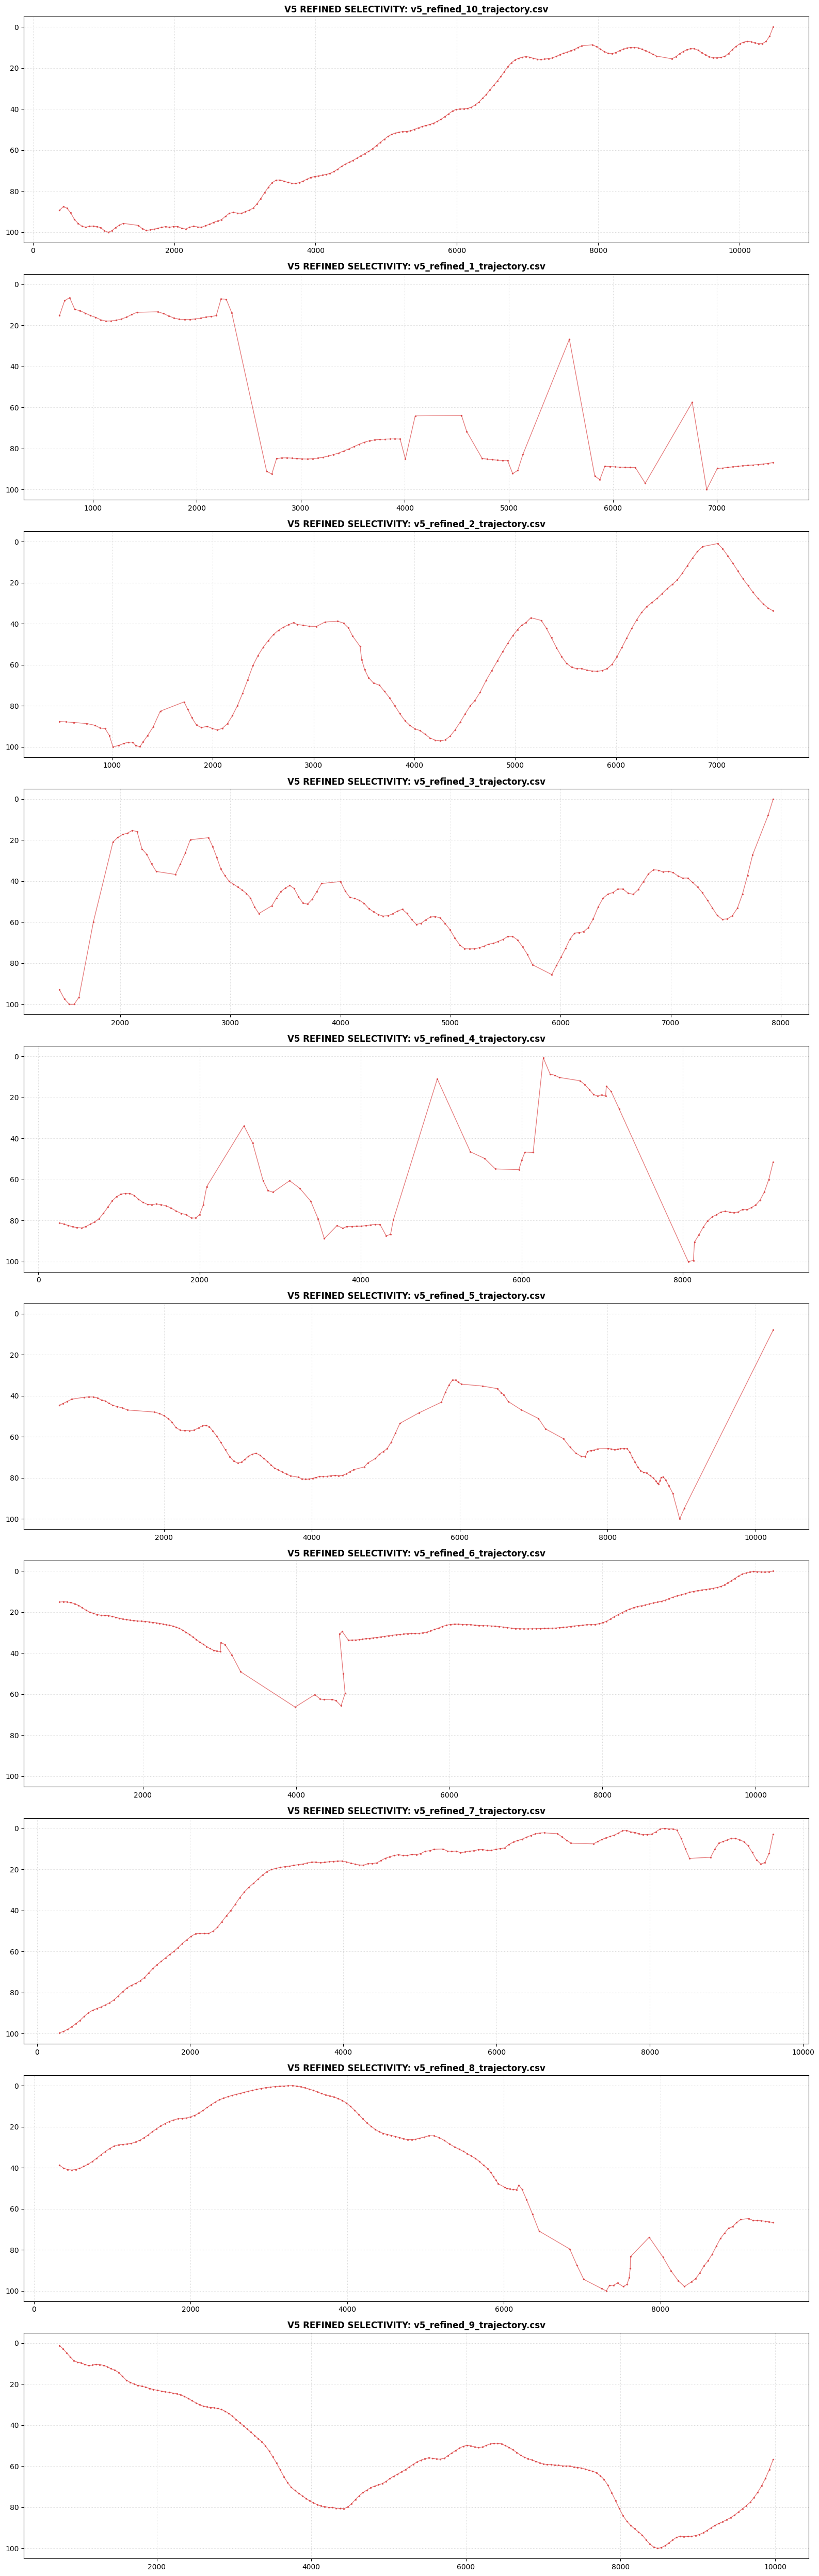


--- 📑 LIST OF V5 REFINED CSVs ---
📄 v5_refined_10_trajectory.csv
📄 v5_refined_1_trajectory.csv
📄 v5_refined_2_trajectory.csv
📄 v5_refined_3_trajectory.csv
📄 v5_refined_4_trajectory.csv
📄 v5_refined_5_trajectory.csv
📄 v5_refined_6_trajectory.csv
📄 v5_refined_7_trajectory.csv
📄 v5_refined_8_trajectory.csv
📄 v5_refined_9_trajectory.csv


In [29]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# --- V5 REFINED SELECTIVITY SETTINGS ---
ROLLING_WINDOW = 25     # Medium window for local context
V5_Z_THRESHOLD = 1.4    # High selectivity (tighter than balanced, cleaner than ultra)
MAX_Y_JUMP = 10         # Strict limit on frame-to-frame "teleporting"
NEW_CONSTANT_SPEED = 50

def update_and_replot_v5():
    # 1. Identify only the original source files
    csv_files = sorted(glob.glob("*_trajectory.csv"))
    # Skip any versioned files (v2, v3, v4, v5, etc)
    input_files = [f for f in csv_files if not any(p in f for p in ["cleaned_", "extreme_", "v3_", "v4_", "v5_"])]

    if not input_files:
        print("❌ No original trajectory CSVs found to process.")
        return

    final_files = []

    for csv_file in input_files:
        df = pd.read_csv(csv_file)
        initial_len = len(df)

        # --- ROLLING Z-SCORE FILTER ---
        # This calculates how 'weird' a point is compared to its immediate neighbors
        roller = df['y_normalized'].rolling(window=ROLLING_WINDOW, center=True)
        rolling_mean = roller.mean()
        rolling_std = roller.std()

        # Calculate Z and filter
        # .fillna(0) keeps the first/last few frames from being deleted by the window
        z_score_local = np.abs((df['y_normalized'] - rolling_mean) / rolling_std).fillna(0)
        df_clean = df[z_score_local < V5_Z_THRESHOLD].copy()

        # --- DELTA JUMP FILTER ---
        df_clean['y_diff'] = df_clean['y_normalized'].diff().abs()
        df_clean = df_clean[df_clean['y_diff'] < MAX_Y_JUMP].copy()

        # 2. Recalculate horizontal progression
        x_base = df_clean['x_smooth'] if 'x_smooth' in df_clean.columns else df_clean['original_x']
        df_clean['path_x'] = x_base + (df_clean['frame'] * NEW_CONSTANT_SPEED)

        # 3. Save as V5
        new_filename = f"v5_refined_{csv_file}"
        df_clean.to_csv(new_filename, index=False)
        final_files.append(new_filename)

        print(f"💎 V5 Refined: {new_filename} (Kept {len(df_clean)} high-quality points)")

    # --- PLOTTING ---
    if final_files:
        fig, axes = plt.subplots(len(final_files), 1, figsize=(16, 5 * len(final_files)))
        if len(final_files) == 1: axes = [axes]

        for i, file in enumerate(final_files):
            df_plot = pd.read_csv(file)
            ax = axes[i]

            # Plot with dots and thin lines to see the high-precision "inliers"
            ax.plot(df_plot['path_x'], df_plot['y_normalized'], color='tab:red', linewidth=1, marker='.', markersize=3, alpha=0.6)
            ax.set_ylim(-5, 105)
            ax.invert_yaxis()
            ax.set_title(f"V5 REFINED SELECTIVITY: {file}", fontsize=12, fontweight='bold')
            ax.grid(True, linestyle=':', alpha=0.5)

        plt.tight_layout()
        plt.savefig('v5_refined_trajectories.png', dpi=300)
        plt.show()

    print("\n--- 📑 LIST OF V5 REFINED CSVs ---")
    for f in final_files:
        print(f"📄 {f}")

# Execute
update_and_replot_v5()

In [30]:
import os
import shutil

# --- CONFIGURATION ---
SOURCE_DIR = "./"  # Where the files currently are (local Colab environment)
DEST_DIR = "/content/drive/MyDrive/YOLOv11_Fish_Project/v5_refined_results"

# 1. Create the destination folder if it doesn't exist
if not os.path.exists(DEST_DIR):
    os.makedirs(DEST_DIR)
    print(f"📂 Created new folder: {DEST_DIR}")
else:
    print(f"✅ Folder already exists: {DEST_DIR}")

# 2. List of specific V5 files to move
files_to_move = [
    "v5_refined_1_trajectory.csv", "v5_refined_2_trajectory.csv",
    "v5_refined_3_trajectory.csv", "v5_refined_4_trajectory.csv",
    "v5_refined_5_trajectory.csv", "v5_refined_6_trajectory.csv",
    "v5_refined_7_trajectory.csv", "v5_refined_8_trajectory.csv",
    "v5_refined_9_trajectory.csv", "v5_refined_10_trajectory.csv"
]

# 3. Move the files
print("\n--- MOVING FILES ---")
moved_count = 0
for file_name in files_to_move:
    source_path = os.path.join(SOURCE_DIR, file_name)
    dest_path = os.path.join(DEST_DIR, file_name)

    if os.path.exists(source_path):
        shutil.move(source_path, dest_path)
        print(f"🚚 Moved: {file_name}")
        moved_count += 1
    else:
        print(f"⚠️ Warning: {file_name} not found in current directory.")

print(f"\n✨ Done! {moved_count} files are now safe in your Drive project folder.")

📂 Created new folder: /content/drive/MyDrive/YOLOv11_Fish_Project/v5_refined_results

--- MOVING FILES ---
🚚 Moved: v5_refined_1_trajectory.csv
🚚 Moved: v5_refined_2_trajectory.csv
🚚 Moved: v5_refined_3_trajectory.csv
🚚 Moved: v5_refined_4_trajectory.csv
🚚 Moved: v5_refined_5_trajectory.csv
🚚 Moved: v5_refined_6_trajectory.csv
🚚 Moved: v5_refined_7_trajectory.csv
🚚 Moved: v5_refined_8_trajectory.csv
🚚 Moved: v5_refined_9_trajectory.csv
🚚 Moved: v5_refined_10_trajectory.csv

✨ Done! 10 files are now safe in your Drive project folder.


In [31]:
import os
import shutil
import glob

# --- CONFIGURATION ---
BASE_DRIVE_PATH = "/content/drive/MyDrive/YOLOv11_Fish_Project"
PLOT_DEST = os.path.join(BASE_DRIVE_PATH, "plots_v5")
VIDEO_DEST = os.path.join(BASE_DRIVE_PATH, "videos_source")

# 1. Create folders if they don't exist
for folder in [PLOT_DEST, VIDEO_DEST]:
    if not os.path.exists(folder):
        os.makedirs(folder)
        print(f"📂 Created folder: {folder}")

# 2. Move the V5 Trajectory Plot
plot_file = "v5_refined_trajectories.png"
if os.path.exists(plot_file):
    shutil.move(plot_file, os.path.join(PLOT_DEST, plot_file))
    print(f"🖼️ Moved Plot: {plot_file}")

# 3. Move the 10 Videos (1.mp4 through 10.mp4)
print("\n--- MOVING VIDEOS ---")
video_count = 0
for i in range(1, 11):
    video_name = f"{i}.mp4"
    if os.path.exists(video_name):
        shutil.move(video_name, os.path.join(VIDEO_DEST, video_name))
        print(f"🎥 Moved Video: {video_name}")
        video_count += 1
    else:
        # Check for .mov or other common extensions if .mp4 is missing
        print(f"⚠️ Video {video_name} not found in current directory.")

print(f"\n✨ Task Complete! {video_count} videos and your plot are now safe in Drive.")

📂 Created folder: /content/drive/MyDrive/YOLOv11_Fish_Project/plots_v5
📂 Created folder: /content/drive/MyDrive/YOLOv11_Fish_Project/videos_source
🖼️ Moved Plot: v5_refined_trajectories.png

--- MOVING VIDEOS ---
🎥 Moved Video: 1.mp4
🎥 Moved Video: 2.mp4
🎥 Moved Video: 3.mp4
🎥 Moved Video: 4.mp4
🎥 Moved Video: 5.mp4
🎥 Moved Video: 6.mp4
🎥 Moved Video: 7.mp4
🎥 Moved Video: 8.mp4
🎥 Moved Video: 9.mp4
🎥 Moved Video: 10.mp4

✨ Task Complete! 10 videos and your plot are now safe in Drive.
